In [1]:
from tock import *

Nondeterministic finite automata
================================

A nondeterministic finite automaton (NFA) can bilocate, even multilocate: on reading an input symbol, there may be more than one state that it can change to, and it pursues all possible paths in parallel. If any path reaches the end of the input in a final state, then the automaton accepts the string.

In [2]:
m = read_csv("../examples/sipser-1-27.csv")
m.is_finite(), m.is_deterministic()

(True, False)

In [3]:
to_table(m)

,ε,0,1
>q1,,q1,"{q1,q2}"
q2,q3,q3,
q3,,,q4
@q4,,q4,q4


There are two main differences in this table from a DFA. First, a cell can have more than one state. For example, if the machine is in state `q1` and the next input symbol is a `1`, then the machine can change to either `q1` or `q2`. Use curly braces for sets of states. (It's an error to omit them.) If a cell has no states, either write `{}` or leave the cell blank.

The second difference is that there is a column for the empty string, which is written `&`. (The ampersand is supposed to look like "et", so I figured it would be a good approximation to ε, which is a Greek "e".) If the machine is in state `q2`, then it can change to state `q3` _without_ reading in any input symbols.

This is what the state transition diagram looks like:

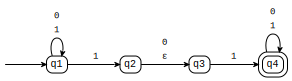

In [4]:
to_graph(m)

Now it's a little easier to see that this machine accepts strings that contain either `101` or `11`. Let's run the automaton on a string:

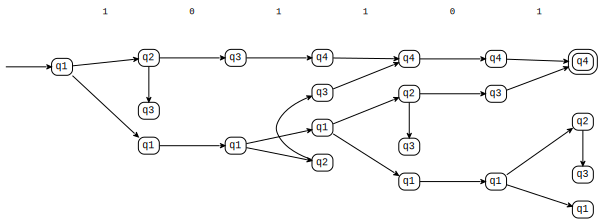

In [5]:
run(m, "1 0 1 1 0 1")

As in a DFA run, each node indicates a configuration, that is, a state that the machine can be in at a particular time. Nodes in the same column correspond to the same input position. An edge between two configurations means that the automaton can move from one to the other. Note that unlike in a DFA run, a node can have more than one outgoing edge. Since there is a path that ends with a double node, the machine accepted the string.

Here's another string:

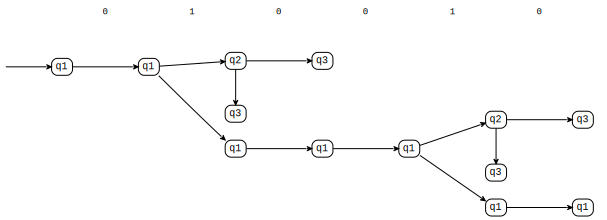

In [6]:
run(m, "0 1 0 0 1 0")

The absence of a double node means that the string was rejected.

In a nondeterministic automaton, it's possible that there are infinitely many runs for a given input string. That's not a problem -- consider the following NFA, which (for some reason) loops through a bunch of epsilon transitions before reading in a single `0`.

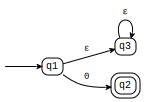

In [7]:
m = read_csv("../examples/nfaloop.csv")
to_graph(m)

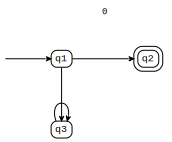

In [8]:
run(m, "0")

This graph represents an infinite number of runs, each of which loops in state `q1` for some number of times, then moves on to state `q2`.